<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 1

## Desarrollo de una herramienta analítica usando solo Python

Este laboratorio busca evaluar las habilidades relacionadas con la primera parte del curso, correspondiente a las primeras tres semanas. Este enunciado estará disponible desde la semana 2 y deberá entregarse al final de la semana 4 en el enlace correspondiente. Su desarrollo corresponde al 30% de la calificación total del curso.

Esta actividad responde directamente al segundo objetivo del curso:
* Implementar una herramienta analítica que permita responder una pregunta de negocio para un problema sencillo de analítica de datos, utilizando únicamente algorítmica básica en Python.

Al desarrollar este laboratorio pondrás a prueba tus habilidades para: 
1. Leer datos desde archivos.
2. Almacenar datos en  estructuras de Python.
3. Crear y llamar funciones correctamente.
4. Implementar condicionales diferenciando *if*, *elif* y *else*
5. Implementar ciclos diferenciando el propósito de *for* y *while*
6. Importar paquetes y utilizar sus funciones.

**NOTAS:**
- Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él desde el comienzo.


## Contexto: exploración del potencial para asignar becas Uniandes
La Universidad de los Andes se ha caracterizado por su compromiso con la generación de impacto en la sociedad a través de diferentes programas de becas. Programas como Quiero Estudiar, o Ser Pilo Paga, entre otros, han sido revolucionarios, al permitir que estudiantes de bajos recursos puedan acceder a una de las universidades privadas más importantes del país.

Actualmente, la Universidad quiere evaluar el potencial impacto que tendrían algunos programas de *acción afirmativa* para asignación de becas, con base en información demográfica que ha obtenido a través de encuestas. Se cuenta con información respecto a la edad, género, estado civil, estrato socio-económico, región de proveniencia, desempeño académico y nivel de escolaridad de las personas que han respondido encuestas. Los encargados de diseñar el programa saben que utilizar criterios basados en este tipo de variables es un tema sensible, pero es necesario si se quieren focalizar las oportunidades en poblaciones menos representadas.

El objetivo de este laboratorio es crear una herramienta computacional que permita a un tomador de decisiones explorar qué efecto podría tener el uso de diferentes reglas para seleccionar la población que sería beneficiaria de las becas. Puntualmente, se espera que, dadas unas reglas de selección (ej.: pertenecer a cierta región, rango de edad, etc.), la herramienta ofrezca información sobre la población potencialmente beneficiada, de forma que exista un sustento al momento de definir las reglas de selección.

## 1. Obtención e inspección de archivos

Los datos de encuestas fueron obtenidos como parte de un trabajo de campo, y por limitaciones tecnológicas, solo se cuenta con la información en archivos de texto plano. Cada archivo corresponde a una de las variables antes mencionadas y se puede garantizar que todos relacionan a las personas encuestadas en el mismo orden (i.e., la primera línea de todos los archivos corresponde a datos de la primera persona encuestada, la segunda línea a la segunda persona, etc.).

Los archivos con los que se cuenta son:
* *edades.txt*: un archivo ordenado con las edades de cada persona de la población encuestada 
* *género.txt*: un archivo ordenado con el género de cada persona de la población encuestada 
* *estado_civil.txt*: un archivo ordenado con el estado civil de cada persona de la población encuestada 
* *escolaridad.txt*: un archivo ordenado con el nivel de escolaridad de cada persona de la población encuestada 
* *estrato.txt*: un archivo ordenado con el estrato socio-económico de cada persona de la población encuestada
* *region.txt*: un archivo ordenado con la región de proveniencia de cada persona de la población encuestada

**Misión 1**

Poner en variables de Python la información que está en los archivos listados arriba.

* *Versión base*: escribe línea a línea el código necesario para poner en variables de Python la información de cada uno de los archivos.

* *Milla extra*: escribe una función que sea capaz de hacer lo anterior para un archivo y úsala en un ciclo para automatizar la lectura de los diferentes archivos.

In [114]:
# código
def lecturarchivo(txt):
    with open(txt) as file:
        file= file.read()
        file= file.splitlines()
        #Convertimos el tipo de informacion que contiene si es string o float
        for i in range(len(file)):
            if file[i].isalpha() == False and file[i]!= 'no binario':
                file[i]=float(file[i])
    return file

archivos= ["edad.txt","genero.txt","estado_civil.txt","escolaridad.txt","estrato.txt","region.txt","promedio.txt"]

variablesresultados={}        
for i in archivos:
     variablesresultados[i.split('.')[0]]=lecturarchivo(i)

**Misión 2**

Reportar las principales características en los datos.
* *Versión base*: utilizar métricas básicas como conteos o promedios por categorías en los datos.
* *Milla extra*: utilizar visualizaciones simples como diagramas de barras, de pastel u otros.

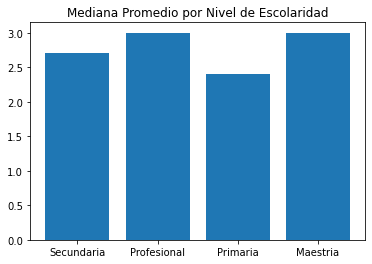

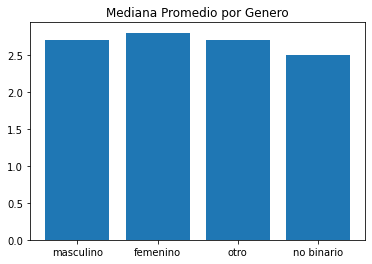

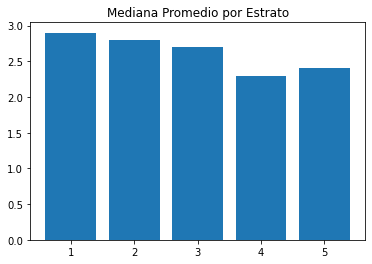

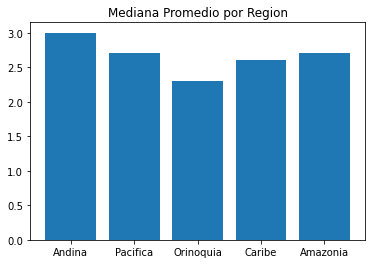

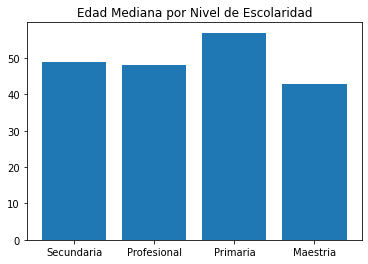

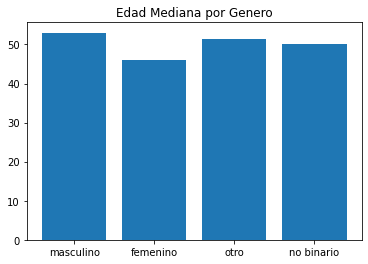

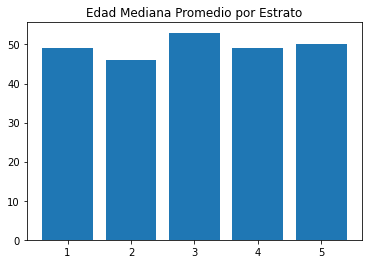

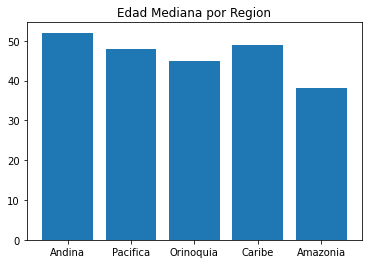

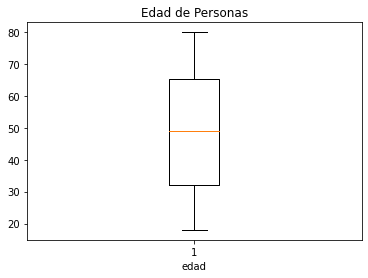

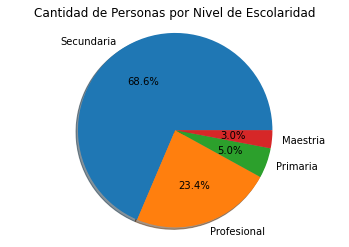

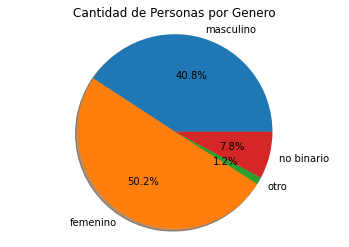

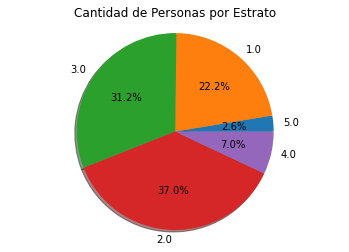

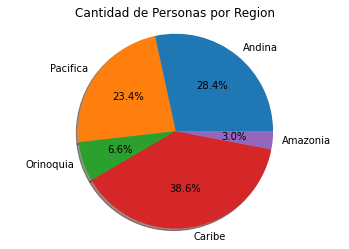

In [116]:
# código

# importación de paquetes necesarios
import matplotlib.pyplot as plt
import math as mth
import numpy as np

# función que calcula la mediana de una lista de datos numéricos
def medianacategoria(vectornumerico, vectorcategoria):
    listacategoria= []
    diccionario ={}
    for i in vectorcategoria:
        if i not in listacategoria:
            listacategoria.append(i)
        else:
            continue
    
    #Creamos vector auxiliar para identificar datos que corresponden a esa categoria
    for i in listacategoria:
        vectorauxiliar= []
        for j in range(len(vectornumerico)):
            if vectorcategoria[j] == i:
                vectorauxiliar.append(vectornumerico[j])
            else:
                continue
        vectorauxiliar = np.array(vectorauxiliar)
        mediana=np.percentile(vectorauxiliar, 50)
        
        diccionario[i]= mediana
        
    return diccionario

def medianacategoriabecados(vectornumerico, vectorcategoria, vectorbecados, decision):
    listacategoria= []
    diccionario ={}
    for i in vectorcategoria:
        if i not in listacategoria:
            listacategoria.append(i)
        else:
            continue
    
    #Creamos vector auxiliar para identificar datos que corresponden a esa categoria
    for i in listacategoria:
        vectorauxiliar= []
        for j in range(len(vectornumerico)):
            if vectorcategoria[j] == i and vectorbecados[j] == decision:
                vectorauxiliar.append(vectornumerico[j])
            else:
                continue
        if len(vectorauxiliar)==0:
            vectorauxiliar.append(0)
        vectorauxiliar = np.array(vectorauxiliar)
        mediana=np.percentile(vectorauxiliar, 50)
        
        diccionario[i]= mediana
        
    return diccionario


def contadorcategoria(vectornumerico, vectorcategoria):
    listacategoria= []
    diccionario ={}
    for i in vectorcategoria:
        if i not in listacategoria:
            listacategoria.append(i)
        else:
            continue
    
    #Creamos vector auxiliar para identificar datos que corresponden a esa categoria
    for i in listacategoria:
        vectorauxiliar= []
        contador=0
        for j in range(len(vectornumerico)):
            if vectorcategoria[j] == i:
                contador+=1
            else:
                continue
        
        diccionario[i]= contador
        
    return diccionario   


# función que calcula la desviación de una lista de datos numéricos
def desvestcategoria(vectornumerico, vectorcategoria):
    listacategoria= []
    diccionario ={}
    for i in vectorcategoria:
        if i not in listacategoria:
            listacategoria.append(i)
        else:
            continue
    
    #Creamos vector auxiliar para identificar datos que corresponden a esa categoria
    for i in listacategoria:
        vectorauxiliar= []
        for j in range(len(vectornumerico)):
            if vectorcategoria[j] == i:
                vectorauxiliar.append(vectornumerico[j])
            else:
                continue
        vectorauxiliar = np.array(vectorauxiliar)
        desviacion=np.std(vectorauxiliar)
        
        diccionario[i]=desviacion
        
    return diccionario

#print(desvestcategoria(variablesresultados['promedio'],variablesresultados['escolaridad']))
#print(desvestcategoria(variablesresultados['promedio'],variablesresultados['genero']))
#print(desvestcategoria(variablesresultados['promedio'],variablesresultados['estrato']))
#print(desvestcategoria(variablesresultados['promedio'],variablesresultados['region']))

#función que visualiza las características de una población dada
#(nota que la variable 'poblacion' es local; podemos pasar cualquier población a la función)

def graficodebarras (diccionario, titulo):
    keys = diccionario.keys()
    values = diccionario.values()
    plt.bar(keys, values)
    plt.title(titulo)
    plt.show()
    
      
#Graficos con respecto al promedio   
graficodebarras(medianacategoria(variablesresultados['promedio'],variablesresultados['escolaridad']),"Mediana Promedio por Nivel de Escolaridad" )
graficodebarras(medianacategoria(variablesresultados['promedio'],variablesresultados['genero']),"Mediana Promedio por Genero" )
graficodebarras(medianacategoria(variablesresultados['promedio'],variablesresultados['estrato']),"Mediana Promedio por Estrato")
graficodebarras(medianacategoria(variablesresultados['promedio'],variablesresultados['region']),"Mediana Promedio por Region")
#Graficos con respecto a la edad
graficodebarras(medianacategoria(variablesresultados['edad'],variablesresultados['escolaridad']),"Edad Mediana por Nivel de Escolaridad")
graficodebarras(medianacategoria(variablesresultados['edad'],variablesresultados['genero']),"Edad Mediana por Genero" )
graficodebarras(medianacategoria(variablesresultados['edad'],variablesresultados['estrato']),"Edad Mediana Promedio por Estrato")
graficodebarras(medianacategoria(variablesresultados['edad'],variablesresultados['region']),"Edad Mediana por Region")

def graficoboxplot(diccionario,titulo):
    plt.boxplot(diccionario)
    plt.xlabel('edad')
    plt.title(titulo)
    plt.show()

graficoboxplot(variablesresultados['edad'], "Edad de Personas")
    
def graficopie (diccionario, titulo):
    plt.figure()
    keys = diccionario.keys()
    values = diccionario.values()
    plt.pie(values, labels = keys,autopct='%1.1f%%',shadow=True)
    plt.title(titulo)
    plt.axis('equal')
    plt.show()




graficopie(contadorcategoria(variablesresultados['promedio'],variablesresultados['escolaridad']), "Cantidad de Personas por Nivel de Escolaridad")
graficopie(contadorcategoria(variablesresultados['promedio'],variablesresultados['genero']),"Cantidad de Personas por Genero")
graficopie(contadorcategoria(variablesresultados['promedio'],variablesresultados['estrato']),"Cantidad de Personas por Estrato")  
graficopie(contadorcategoria(variablesresultados['promedio'],variablesresultados['region']),"Cantidad de Personas por Region")


## 2. Abordaje de la pregunta de negocio

El comité encargado de diseñar el programa de becas ha tenido dificultades para llegar a acuerdos. Algunos piensan que el criterio principal de selección debería ser respecto a lo económico y académico, sin importar otras características personales, mientras que otros piensan que considerar estas características es, de hecho, parte del espíritu del programa.

* El primer grupo sugiere que se deben tomar en orden ascendente los estratos y elegir, en cada uno de ellos, al 2% de personas con promedio académico superior en esa sub-población, hasta que se agoten las becas disponibles. En caso de quedar becas disponibles al final del proceso, se repite el mismo esquema, considerando que ya no se tienen en cuenta las personas que hayan sido elegidas en rondas anteriores.

* El segundo grupo sugiere que los recibidores de becas deben estar igualmente distribuidos entre las diferentes regiones y generos, considerando, por supuesto, que para cada una de esas sub-poblaciones, las personas elegidas sean las de mejores promedios académicos.

Dado que las diferencias entre estos grupos obedecen a su entendimiento particular del problema, el presidente del comité propone utilizar los datos disponibles de las encuestas, sugiriendo que se analice qué características tendría la población de elegidos bajo cada uno de los dos criterios expuestos.

**Misión 3**

Defina la pregunta de negocio y la pregunta de *analytics* para esta situación.

In [117]:
# respuesta en texto (solo leeremos los primeros 300 caracteres de la respuesta)

pregunta_negocio = 'Determinar la poblacion susceptible de becas dadas unas reglas de seleccion y las caracteristicas generales de dicha poblacion'

pregunta_analytics = 'Implementar una herramienta computacional que utilice modelos descriptivos y las reglas de seleccion dadas por el comite para determinar la poblacion susceptible de becas y sus caracteristicas generales'

**Misión 4**

Desarrollar un algoritmo que permita conocer la población que sería becada según los criterios propuestos por el *primer grupo* mencionado arriba.

In [119]:
# código
def contadornobecados(vectordecision, vectorcategoria, decision):
    listacategoria= []
    diccionario ={}
    for i in vectorcategoria:
        if i not in listacategoria:
            listacategoria.append(i)
        else:
            continue
    
    #Creamos vector auxiliar para identificar datos que corresponden a esa categoria
    for i in listacategoria:
        vectorauxiliar= []
        contador=0
        for j in range(len(vectordecision)):
            if vectorcategoria[j] == i and vectordecision[j] == decision :
                contador+=1
            else:
                continue
        
        diccionario[i]= contador
        
    return diccionario 

def contadornobecadosconedad(vectordecision, vectorcategoria,vectoredad,rangoedad,decision):
    listacategoria= []
    diccionario ={}
    for i in vectorcategoria:
        if i not in listacategoria:
            listacategoria.append(i)
        else:
            continue
    
    #Creamos vector auxiliar para identificar datos que corresponden a esa categoria
    for i in listacategoria:
        vectorauxiliar= []
        contador=0
        for j in range(len(vectordecision)):
            if vectorcategoria[j] == i and vectoredad[j] >= rangoedad[0] and vectoredad[j] <= rangoedad[1] and \
            vectordecision[j] == decision :
                contador+=1
            else:
                continue
        
        diccionario[i]= contador
        
    return diccionario 

def maximodelcriterio(vectorpromedio,vectorestrato,estrato,vectordecision,decision):
    maximo = 0
    posicion ='No cumple'
    for i in range(len(vectorpromedio)):
        if vectorestrato[i]==estrato and vectordecision[i]==decision and vectorpromedio[i] > maximo:
            maximo = vectorpromedio[i]
            posicion = i
        else:
            continue
            
    return [posicion,maximo, estrato]

def maximomultiplescriterios2(vectorpromedio,vectorcriterio1,vectorcriterioedad,criterio1,rangoedad,vectordecision,decision):
    maximo = -1
    edad = 'No cumple'
    posicion ='No cumple'
    for i in range(len(vectorpromedio)):
        if vectorcriterio1[i]==criterio1 and vectorcriterioedad[i] >= rangoedad[0] and vectorcriterioedad[i] <= rangoedad[1] \
        and vectordecision[i]==decision and vectorpromedio[i] > maximo:
            maximo = vectorpromedio[i]
            posicion = i
            edad= vectorcriterioedad[i]
        else:
            continue
            
    return [posicion,maximo, criterio1,edad]


###Parametros####
Numerodebecas =100
segmentomuestra = 0.02

#1. Elegir los estratos activos en la base:
listacategoria= []
for i in variablesresultados['estrato']:
        if i not in listacategoria:
            listacategoria.append(i)
        else:
            continue

#2.ordenamos los estratos de manera ascendente y hacemos un vector auxiliar para los no becados
listacategoria.sort()
vectorauxiliarbecas = ['No']* len(variablesresultados['estrato'])

#Hacemos la rutina de asignacion de becas

becasdisponibles= Numerodebecas
becas= True

while becas ==True:
    #Encontramos la cantidad de personas por estrato que no han sido asignados con beca
    contadorestrato=contadornobecados(vectorauxiliarbecas,variablesresultados['estrato'], 'No')
    
    #Control que pueda seguir repartiendo becas por lo menos en algun estrato
    becasrepartir= False
    for k in listacategoria:
        control= mth.floor(contadorestrato[k]*segmentomuestra)
        print('El numero de becas a entregar en el estrato ' + str(k) + ' es:' + str(control))
        if control > 0:
            becasrepartir= True
    
    if becasrepartir == False:
        becas = False
        break
    
    #Repartimos las becas
    print('La cantidad de personas no becadas por estrato son (estrato:personas):' + str(contadorestrato))
    for i in listacategoria:
        print('Estrato '+ str(i))
        #Calculamos el numero de becas redondeando hacia abajo por estrato
        becaporestrato= mth.floor(contadorestrato[i]*segmentomuestra)
        #Si las becas a repartir al estrato son diferentes a cero proceder con la reparticion:
        if becaporestrato != 0 and becas == True:
            #Determinamos la posicion de la gente que debe ser becada
            for j in range(becaporestrato):
                ubicacion=maximodelcriterio(variablesresultados['promedio'],variablesresultados['estrato'],i,vectorauxiliarbecas,'No')
                print('Caracteristicas de la persona becada (posicion, resultado, estrato):' + str(ubicacion))
                #Seleccionamos los becados
                vectorauxiliarbecas[ubicacion[0]] = 'Si'
                #Restamos una beca a la variable becasdisponibles
                becasdisponibles = becasdisponibles -1 
                #Imprimimos las becas disponibles hasta el momento
                print('Las becas disponibles son: ' + str(becasdisponibles))
                #Revisamos que existan becas disponibles
                if becasdisponibles == 0:
                    becas = False
                    break
                    
    #Control de las becas disponibles                
    if becasdisponibles <= 0:
        becas = False
        break

print('Las becas disponibles a asignar son: ' + str(Numerodebecas))
print('Las becas disponibles al finalizar el ejercicio son: ' + str(becasdisponibles))
print('Las becas asignadas fueron: ' + str(Numerodebecas-becasdisponibles))


#Creamos un diccionario para guardar los becados de la metodologia 1 y actualizar el diccionario general
becadosmetodologia1 = {'becados metodologia 1': vectorauxiliarbecas}
variablesresultados.update(becadosmetodologia1)

El numero de becas a entregar en el estrato 1.0 es:2
El numero de becas a entregar en el estrato 2.0 es:3
El numero de becas a entregar en el estrato 3.0 es:3
El numero de becas a entregar en el estrato 4.0 es:0
El numero de becas a entregar en el estrato 5.0 es:0
La cantidad de personas no becadas por estrato son (estrato:personas):{5.0: 13, 1.0: 111, 3.0: 156, 2.0: 185, 4.0: 35}
Estrato 1.0
Caracteristicas de la persona becada (posicion, resultado, estrato):[376, 5.0, 1.0]
Las becas disponibles son: 99
Caracteristicas de la persona becada (posicion, resultado, estrato):[162, 4.9, 1.0]
Las becas disponibles son: 98
Estrato 2.0
Caracteristicas de la persona becada (posicion, resultado, estrato):[243, 5.0, 2.0]
Las becas disponibles son: 97
Caracteristicas de la persona becada (posicion, resultado, estrato):[7, 4.9, 2.0]
Las becas disponibles son: 96
Caracteristicas de la persona becada (posicion, resultado, estrato):[207, 4.9, 2.0]
Las becas disponibles son: 95
Estrato 3.0
Caracteristi

**Misión 5**

Desarrollar un algoritmo que permita conocer la población que sería becada según los criterios propuestos por el *segundo grupo* mencionado arriba.

In [120]:
# código
#El segundo grupo sugiere que los recibidores de becas deben estar igualmente 
#distribuidos entre las diferentes regiones y generos, considerando, por supuesto,
#que para cada una de esas sub-poblaciones, las personas elegidas sean las de mejores promedios académicos.

#Numero de becas dividido el numero de regiones y cada region divido entre la cantidad de generos

def maximomultiplescriterios(vectorpromedio,vectorcriterio1,vectorcriteriogenero,criterio1,criterio2,vectordecision,decision):
    maximo = -1
    region = 'No cumple'
    posicion ='No cumple'
    genero = 'No cumple'
    for i in range(len(vectorpromedio)):
        if vectorcriterio1[i]==criterio1 and vectorcriteriogenero[i]==criterio2 \
        and vectordecision[i]==decision and vectorpromedio[i] > maximo:
            maximo = vectorpromedio[i]
            posicion = i
            region= vectorcriterio1[i]
            genero =vectorcriteriogenero[i]
        else:
            continue
            
    return [posicion,maximo, region,genero]

###Parametros####
Numerodebecas=100
becasdisponibles=Numerodebecas

#1. Elegir las regiones y generos activos en la base:
listaregiones= []
for i in variablesresultados['region']:
        if i not in listaregiones:
            listaregiones.append(i)
        else:
            continue

            
#2.Hacemos un vector auxiliar para los no becados
vectorauxiliarbecas = ['No']* len(variablesresultados['region'])
#3.Determinamos el numero de becas por region y por genero
becasdisponibles_region= Numerodebecas// len(listaregiones)
#Hacemos la rutina de asignacion de becas
for i in listaregiones:
    diccionario_generoregion=contadornobecados(variablesresultados['region'], variablesresultados['genero'], i)
    totalporregion=sum(diccionario_generoregion.values())
    print('Beca por region:' + str(i))
    for j in diccionario_generoregion.keys():
        print('Genero a asignar :' + str(j))
        becas_genero_region= mth.floor((diccionario_generoregion[j]/totalporregion)*becasdisponibles_region)
        print('Numero de becas a asignar a esta poblacion: ' + str(i) + ':' + str(j) + ' ' + str(becas_genero_region))
        if becas_genero_region != 0:
            #Control de que la cantidad de becas sea menor o igual a la cantidad de gente por repartir
            if diccionario_generoregion[j] < becas_genero_region:
                becas_genero_region=diccionario_generoregion[j]
                print('La cantidad de personas es inferior a la cantidad de becas por asignar')
            for k in range(becas_genero_region):
                ubicacion=maximomultiplescriterios(variablesresultados['promedio'],variablesresultados['region'],\
                                           variablesresultados['genero'],i,j,vectorauxiliarbecas,'No')
                print('Caracteristicas de la persona becada (posicion, resultado, estrato):' + str(ubicacion))
    
                #Seleccionamos los becados
                vectorauxiliarbecas[ubicacion[0]] = 'Si'
                #Restamos una beca a la variable becasdisponibles
                becasdisponibles = becasdisponibles -1 
                #Imprimimos las becas disponibles hasta el momento
                print('Las becas disponibles son: ' + str(becasdisponibles))
                
                #Revisamos que existan becas disponibles
                if becasdisponibles == 0:
                    break

                
        #Revisamos que existan becas disponibles
        if becasdisponibles == 0:
            break

print('Las becas disponibles a asignar son: ' + str(Numerodebecas))
print('Las becas disponibles al finalizar el ejercicio son: ' + str(becasdisponibles))
print('Las becas asignadas fueron: ' + str(Numerodebecas-becasdisponibles))
#Creamos un diccionario para guardar los becados de la metodologia 1 y actualizar el diccionario general
becadosmetodologia2 = {'becados metodologia 2': vectorauxiliarbecas}
variablesresultados.update(becadosmetodologia2)






Beca por region:Andina
Genero a asignar :masculino
Numero de becas a asignar a esta poblacion: Andina:masculino 9
Caracteristicas de la persona becada (posicion, resultado, estrato):[162, 4.9, 'Andina', 'masculino']
Las becas disponibles son: 99
Caracteristicas de la persona becada (posicion, resultado, estrato):[394, 4.8, 'Andina', 'masculino']
Las becas disponibles son: 98
Caracteristicas de la persona becada (posicion, resultado, estrato):[9, 4.5, 'Andina', 'masculino']
Las becas disponibles son: 97
Caracteristicas de la persona becada (posicion, resultado, estrato):[452, 4.5, 'Andina', 'masculino']
Las becas disponibles son: 96
Caracteristicas de la persona becada (posicion, resultado, estrato):[222, 4.4, 'Andina', 'masculino']
Las becas disponibles son: 95
Caracteristicas de la persona becada (posicion, resultado, estrato):[398, 4.3, 'Andina', 'masculino']
Las becas disponibles son: 94
Caracteristicas de la persona becada (posicion, resultado, estrato):[428, 4.2, 'Andina', 'mascul

**Misión 6**

Desarrollar un algoritmo, a partir de lo anterior, cuyo resultado permita al comité comparar fácilmente las características de las dos poblaciones hipotéticas que recibirían becas.

*Ayuda*: considera utilizar tus implementaciones de la *Misión 2* para facilitar esta misión.

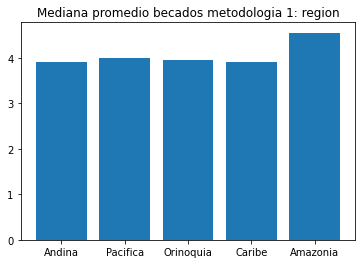

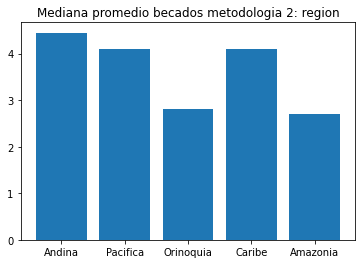

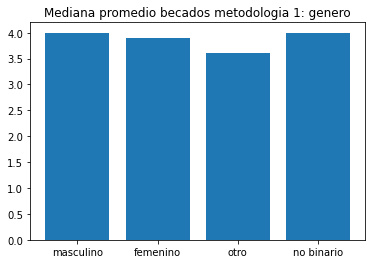

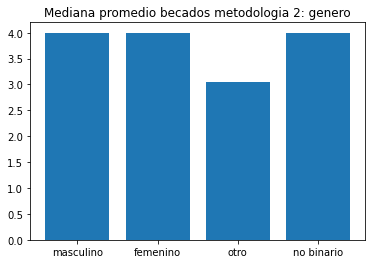

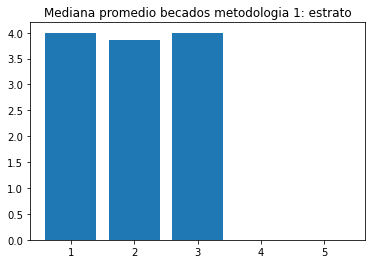

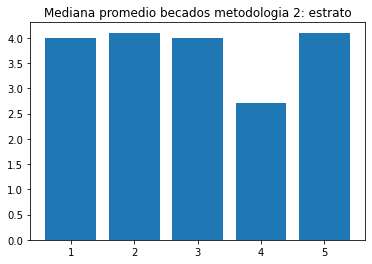

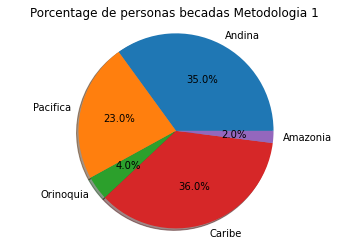

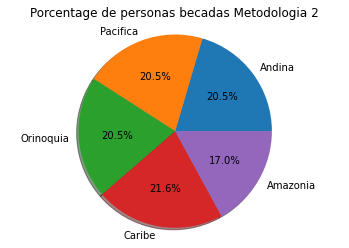

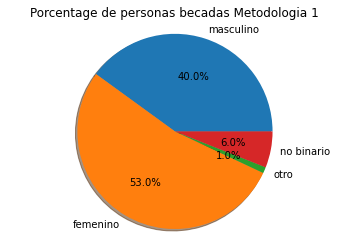

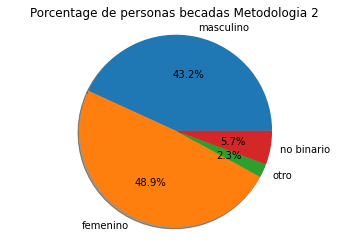

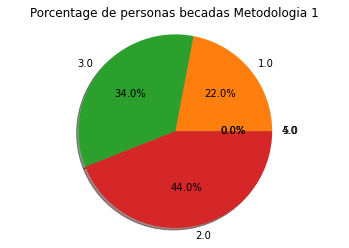

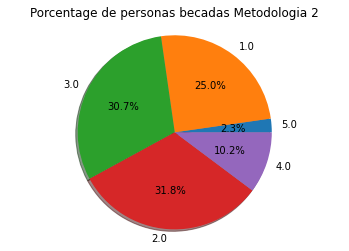

In [138]:
# código

#Grafico de barras
#promedio-region
graficodebarras(medianacategoriabecados(variablesresultados['promedio'], variablesresultados['region'], variablesresultados['becados metodologia 1'], 'Si'),\
                    "Mediana promedio becados metodologia 1: region")
graficodebarras(medianacategoriabecados(variablesresultados['promedio'], variablesresultados['region'], variablesresultados['becados metodologia 2'], 'Si'),\
                    "Mediana promedio becados metodologia 2: region")
#promedio-genero
graficodebarras(medianacategoriabecados(variablesresultados['promedio'], variablesresultados['genero'], variablesresultados['becados metodologia 1'], 'Si'),\
                    "Mediana promedio becados metodologia 1: genero")
graficodebarras(medianacategoriabecados(variablesresultados['promedio'], variablesresultados['genero'], variablesresultados['becados metodologia 2'], 'Si'),\
                    "Mediana promedio becados metodologia 2: genero")
#promedio-estrato
graficodebarras(medianacategoriabecados(variablesresultados['promedio'], variablesresultados['estrato'], variablesresultados['becados metodologia 1'], 'Si'),\
                    "Mediana promedio becados metodologia 1: estrato")
graficodebarras(medianacategoriabecados(variablesresultados['promedio'], variablesresultados['estrato'], variablesresultados['becados metodologia 2'], 'Si'),\
                    "Mediana promedio becados metodologia 2: estrato")

#Grafico de pie:
#Region
graficopie(contadornobecadosconedad(variablesresultados['becados metodologia 1'],variablesresultados['region'],variablesresultados['edad'],[0,100],'Si'),\
               "Porcentage de personas becadas Metodologia 1")
graficopie(contadornobecadosconedad(variablesresultados['becados metodologia 2'],variablesresultados['region'],variablesresultados['edad'],[0,100],'Si'),\
               "Porcentage de personas becadas Metodologia 2")
#Genero
graficopie(contadornobecadosconedad(variablesresultados['becados metodologia 1'],variablesresultados['genero'],variablesresultados['edad'],[0,100],'Si'),\
               "Porcentage de personas becadas Metodologia 1")
graficopie(contadornobecadosconedad(variablesresultados['becados metodologia 2'],variablesresultados['genero'],variablesresultados['edad'],[0,100],'Si'),\
               "Porcentage de personas becadas Metodologia 2")
#Estrato
graficopie(contadornobecadosconedad(variablesresultados['becados metodologia 1'],variablesresultados['estrato'],variablesresultados['edad'],[0,100],'Si'),\
               "Porcentage de personas becadas Metodologia 1")
graficopie(contadornobecadosconedad(variablesresultados['becados metodologia 2'],variablesresultados['estrato'],variablesresultados['edad'],[0,100],'Si'),\
               "Porcentage de personas becadas Metodologia 2")


## 3. Desarrollo de una solución analítica

Reconociendo la complejidad de este problema (que no permite reducirlo a una dicotomía) y viendo el potencial del análisis de datos para enriquecer la discusión y los insumos para tomar decisiones, el comité ha solicitado una herramienta analítica que les permita . Sus requerimientos son:

* La herramienta debe permitir ingresar una política de selección de becados.
    * Se debe poder elegir el rango de edad de los aspirantes.
    * Se debe poder elegir qué proporción de las becas se asigna a cada género, a cada estrato, o a cada región (pero sólo debe elegirse uno de estos criterios).
* La herramienta debe generar un resultado que permita al comité analizar las características de la población potencialmente elegida si se usara la política ingresada.

**Misión 7**

Desarrollar, a partir de lo construido hasta el momento, un algoritmo que permita cumplir con los requerimientos del comité.

In [121]:
# código
def metodologia (data,becas,rangoedad, proporcioncriterio, criterio):
    #data:diccionario con la informacion de la encuesta
    #becas: numero de becas disponibles a asignar
    #rangoedad: list[edad minima, edad maxima]
    #proporcioncriterio: dic{criterio:proporcion a asignar}, debe ser consistente con el criterio
    #criterio: str(genero/estrato/region)
    
    #Mensaje de inicializacion
    print('Vamos a correr una metodologia con el criterio:' + str(criterio) + ' y el rango de edad ' + \
          'minimo:' + str(rangoedad[0])  + ', maximo:' +str(rangoedad[1]))
    
    #Definimos las diferentes categorias que hay dentro del criterio: genero/estrato/region
    listacategoria= []
    diccionariobecas ={}
    for i in data[criterio]:
        if i not in listacategoria:
            listacategoria.append(i)
        else:
            continue
                 
    #Definimos un vector auxiliar de no becados y un resumen de la categoria con la cantidad de personas
    vectorauxiliarbecas = ['No']* len(data[criterio])
    resumencontador=contadorcategoria(data['promedio'],data[criterio])
    resumenconfiltro =contadornobecadosconedad(vectorauxiliarbecas,data[criterio],data['edad'],rangoedad,'No')
    graficopie((resumenconfiltro),'Porcentage de personas por : ' + str(criterio) + ' y rango de edad:' + str(rangoedad))
    print('Resumen de la poblacion sin filtros (criterio:cantidad de personas) ' + str(resumencontador))
    print('Resumen de la poblacion con filtro de edad (criterio:cantidad de personas) ' + str(resumenconfiltro))
    #Definimos la proporcion de becas a entregar en cada uno de los segmentos
    becas_disponibles_segmento =[]
    for i in listacategoria:
        if i in proporcioncriterio:  
            becaporcriterio= mth.floor(becas*proporcioncriterio[i])
            diccionariobecas[i]=becaporcriterio
    
    becasdisponibles=becas
    #Asignamos las becas
    for i in proporcioncriterio:
        print('El criterio es : ' +str(criterio) + ' ' +str(i))
        #Traemos el numero de becas redondeando hacia abajo por criterio del diccionariobecas
        becaporcriteriofinal=diccionariobecas[i]
        print('Las becas del ' + criterio  + ' ' +str(i) + ' son '+ str(becaporcriteriofinal))
        #Si las becas a repartir al criterio son diferentes a cero proceder con la reparticion:
        if becaporcriteriofinal != 0:
            #Determinamos si es mayor la cantidad de becas que el universo disponible de personas a seleccionar
            if resumenconfiltro[i] < becaporcriteriofinal:
                print('Personas disponibles :'+ str(resumenconfiltro[i]) )
                becaporcriteriofinal= resumenconfiltro[i]
                print('Es mayor la cantidad de becas que la gente disponible')
            #Determinamos la posicion de la gente que debe ser becada
            for j in range(becaporcriteriofinal):
                ubicacion=maximomultiplescriterios2(data['promedio'],data[criterio],data['edad'], \
                                         i,rangoedad,vectorauxiliarbecas,'No')
                print('Caracteristicas de la persona becada (posicion, resultado, criterio, edad):' + str(ubicacion))
                #Seleccionamos los becados
                vectorauxiliarbecas[ubicacion[0]] = 'Si'
                #Restamos una beca a la variable becasdisponibles
                becasdisponibles = becasdisponibles -1 
                #Imprimimos las becas disponibles hasta el momento
                print('Las becas disponibles son: ' + str(becasdisponibles))
                #Revisamos que existan becas disponibles
                if becasdisponibles == 0:
                    break
                    
    #Creamos un diccionario para guardar los becados de la metodologia 1 y actualizar el diccionario general
    becadosmetodologianueva = {'becados metodologia nueva': vectorauxiliarbecas}
    data.update(becadosmetodologianueva)
    
    #Graficamos la solucion:
    graficodebarras(medianacategoriabecados(data['promedio'], data[criterio], vectorauxiliarbecas, 'Si'),\
                    "Mediana promedio becados por criterio: " + str(criterio) + ' y rango de edad:' + str(rangoedad))
    if criterio =='estrato':
        graficodebarras(medianacategoriabecados(data['promedio'], data['genero'], vectorauxiliarbecas, 'Si'),\
                        "Mediana promedio becados por criterio: " + str(criterio) + ' y rango de edad:' + str(rangoedad))
        graficodebarras(medianacategoriabecados(data['promedio'], data['region'], vectorauxiliarbecas, 'Si'),\
                        "Mediana promedio becados por criterio: " + str(criterio) + ' y rango de edad:' + str(rangoedad))
    if criterio =='region':
        graficodebarras(medianacategoriabecados(data['promedio'], data['genero'], vectorauxiliarbecas, 'Si'),\
                        "Mediana promedio becados por criterio: " + str(criterio) + ' y rango de edad:' + str(rangoedad))
        graficodebarras(medianacategoriabecados(data['promedio'], data['estrato'], vectorauxiliarbecas, 'Si'),\
                        "Mediana promedio becados por criterio: " + str(criterio) + ' y rango de edad:' + str(rangoedad))
    if criterio =='genero':
        graficodebarras(medianacategoriabecados(data['promedio'], data['region'], vectorauxiliarbecas, 'Si'),\
                        "Mediana promedio becados por criterio: " + str(criterio) + ' y rango de edad:' + str(rangoedad))
        graficodebarras(medianacategoriabecados(data['promedio'], data['estrato'], vectorauxiliarbecas, 'Si'),\
                        "Mediana promedio becados por criterio: " + str(criterio) + ' y rango de edad:' + str(rangoedad))
        
    graficopie(contadornobecadosconedad(vectorauxiliarbecas,data[criterio],data['edad'],rangoedad,'Si'),\
               "Porcentage de personas becadas por : " + str(criterio) + ' y rango de edad:' + str(rangoedad))
    if criterio =='region':
        graficopie(contadornobecadosconedad(vectorauxiliarbecas,data['genero'],data['edad'],rangoedad,'Si'),\
                   "Porcentage de personas becadas por : " + str(criterio) + ' y rango de edad:' + str(rangoedad))
        graficopie(contadornobecadosconedad(vectorauxiliarbecas,data['estrato'],data['edad'],rangoedad,'Si'),\
                   "Porcentage de personas becadas por : " + str(criterio) + ' y rango de edad:' + str(rangoedad))
    if criterio =='genero':
        graficopie(contadornobecadosconedad(vectorauxiliarbecas,data['region'],data['edad'],rangoedad,'Si'),\
                   "Porcentage de personas becadas por : " + str(criterio) + ' y rango de edad:' + str(rangoedad))
        graficopie(contadornobecadosconedad(vectorauxiliarbecas,data['estrato'],data['edad'],rangoedad,'Si'),\
                   "Porcentage de personas becadas por : " + str(criterio) + ' y rango de edad:' + str(rangoedad))
    if criterio =='estrato':
        graficopie(contadornobecadosconedad(vectorauxiliarbecas,data['region'],data['edad'],rangoedad,'Si'),\
                   "Porcentage de personas becadas por : " + str(criterio) + ' y rango de edad:' + str(rangoedad))
        graficopie(contadornobecadosconedad(vectorauxiliarbecas,data['genero'],data['edad'],rangoedad,'Si'),\
                   "Porcentage de personas becadas por : " + str(criterio) + ' y rango de edad:' + str(rangoedad))
    
    return data

**Misión 8**

Proponer, con base en tu propio uso de la herramienta, una política de ingreso que consideres apropiada dado el contexto proporcionado. Si lo crees adecuado, explica, máximo 500 caracteres, las virtudes de tu propuesta (esto puede estar soportado en los datos, o no).

In [122]:
# respuesta en texto (solo leeremos los primeros 300 caracteres de la respuesta)

respuesta = 'Con el fin de tener una politica guiada hacia una accion afirmativa que sea inclusiva \
y favorezca a las poblaciones menos favorecidas,\
se propone hacer una asignacion de becas siguiendo los siguientes criterios:\
Minimo de edad: 15 anos, Maximo de edad: 25 anos, Estrato: 1: 40%, 2: 30%, 3: 20%, 4: 10%, 5:0%. \
La anterior asignacion tendria en cuenta que a medida que el estrato es mas bajo requiere una mayor asignacion de becas,\
siendo una politica incluyendo y buscando reducir la brecha de desigualdad existente. Asimismo, es necesario limitar la edad en un \
rango que capture la poblacion que finaliza secundaria que requiere incentivos para poder acceder a la educacion universitaria,\
por eso se propone el rango de edad anteriormente descrito.'

            
        

**Misión 9**

Ejecutar el algoritmo desarrollado en la *Misión 7* sobre la política que sugieres proponer al comité. Explicar claramente tus conlusiones con el soporte de los resultados de la herramienta.

Vamos a correr una metodologia con el criterio:estrato y el rango de edad minimo:15, maximo:25


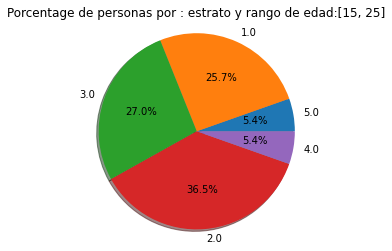

Resumen de la poblacion sin filtros (criterio:cantidad de personas) {5.0: 13, 1.0: 111, 3.0: 156, 2.0: 185, 4.0: 35}
Resumen de la poblacion con filtro de edad (criterio:cantidad de personas) {5.0: 4, 1.0: 19, 3.0: 20, 2.0: 27, 4.0: 4}
El criterio es : estrato 1
Las becas del estrato 1 son 8
Caracteristicas de la persona becada (posicion, resultado, criterio, edad):[287, 4.3, 1, 20.0]
Las becas disponibles son: 19
Caracteristicas de la persona becada (posicion, resultado, criterio, edad):[250, 4.0, 1, 25.0]
Las becas disponibles son: 18
Caracteristicas de la persona becada (posicion, resultado, criterio, edad):[163, 3.7, 1, 20.0]
Las becas disponibles son: 17
Caracteristicas de la persona becada (posicion, resultado, criterio, edad):[466, 3.7, 1, 24.0]
Las becas disponibles son: 16
Caracteristicas de la persona becada (posicion, resultado, criterio, edad):[234, 3.3, 1, 23.0]
Las becas disponibles son: 15
Caracteristicas de la persona becada (posicion, resultado, criterio, edad):[496, 2

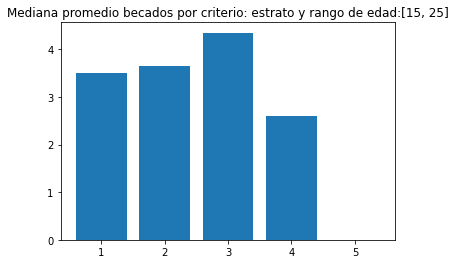

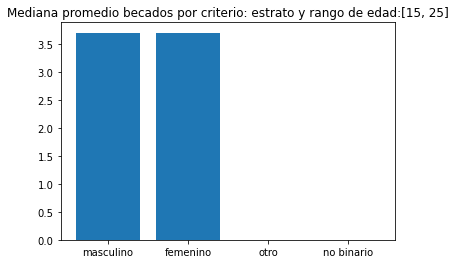

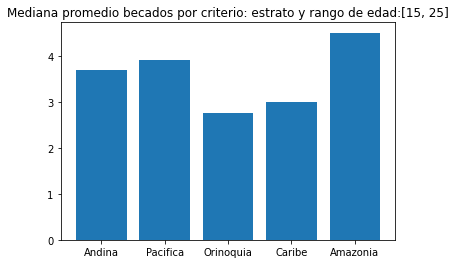

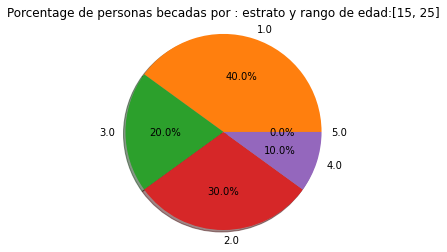

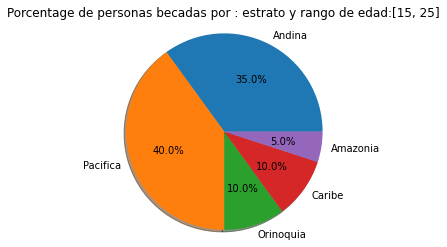

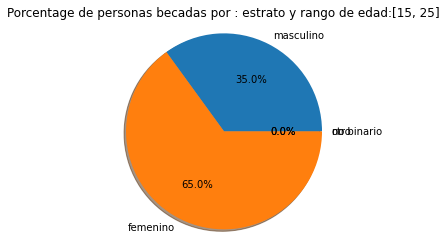

In [124]:
# código
propuesta = metodologia(variablesresultados,20,[15,25],{1:0.4,2:0.3,3:0.2,4:0.1,5:0},'estrato')

conclusion = 'A manera de conclusion se puede decir que con esta politica se esta buscando \
reducir la brecha de inequidad existente, al darle prioridad en la asignacion de becas a los estratos mas bajos y  \
a las personas que finalizaron su educacion secundaria. Lo anterior se puede visualizar en el grafico \
Cantidad de personas becadas por estrato y rango de edad. Asimismo, se puede obserar como las becas son asignadas en un 65% \
al genero femenino y el restante al masculino. Finalmente, entre regione, la participacion seria: Pacifica:40%, Andina:35% \
Orinoquia:10%, Caribe: 10% y Amazonia: 10%.'

## Referencias
* Discriminación Positiva<br> 
https://es.wikipedia.org/wiki/Discriminaci%C3%B3n_positiva
* Análisis de formulación del programa “Ser Pilo Paga”<br>
https://repository.urosario.edu.co/handle/10336/12526
* La acción afirmativa en la Universidad de los Andes: El caso del programa "Oportunidades para talentos nacionales"<br> http://www.scielo.org.co/scielo.php?script=sci_arttext&pid=S0123-885X2004000300005
* Acción afirmativa y equidad: un análisis desde la propuesta de Thomas Nagel<br>
http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S2007-24062016000200049

## Créditos

Camilo Gómez - 11/06/21<br>
*Revisado*: 25/08/21